In [1]:
%load_ext autoreload
%autoreload 1

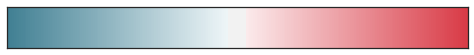

In [2]:
# base libs
import numpy as np
import pandas as pd

pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='white')
cmap = sns.choose_diverging_palette(as_cmap=True)

In [3]:
%aimport dasci.data.explore
%aimport dasci.model.common

import dasci.data.explore as expl
import dasci.model.common as model

In [4]:
df = pd.read_pickle(expl.full_path_name(r'output\train-fe-basic.pickle'))

In [5]:
# in general, it doesn't make sense to calculate correlation for categorical data having more than two values
# hence they should be encoded beforehand
df_encoded = model.encode(df)
corr_matrix = df_encoded.corr()

potential_features = corr_matrix[corr_matrix["SalePrice"].abs() > 0.4].sort_values(by=["SalePrice"]).index.tolist()

# sale price should be the last column
potential_features.remove("SalePrice")
potential_features.append("SalePrice")

corr_matrix = corr_matrix.loc[potential_features, potential_features]
potential_features

['GarageFinish_Unf',
 'MSSubClass_SC60',
 'GarageType_Attchd',
 'GarageFinish_Fin',
 'HeatingQC',
 'Fireplaces',
 'Foundation_PConc',
 'TotRmsAbvGrd',
 'YearRemodAdd',
 'GarageYrBlt',
 'YearBuilt',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'BsmtQual',
 'GarageArea',
 'KitchenQual',
 'ExterQual',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'SalePrice']

(22, 0)

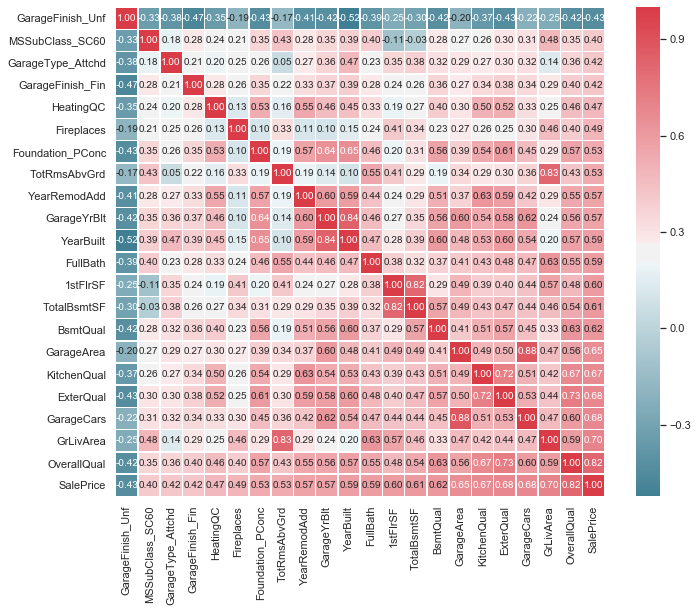

In [6]:
plt.subplots(figsize=(11, 9))
hm = sns.heatmap(
    corr_matrix, 
    cbar=True, 
    annot=True, 
    square=True, 
    fmt='.2f', 
    annot_kws={'size': 10},
    linewidth=0.5, 
    cmap=cmap)
hm.set_ylim(len(potential_features), 0)

Remove columns with high pair-wise corrrelation

In [7]:
cols_to_remove = set()
for i, col in enumerate(reversed(potential_features[:-1])):
    col_corr = corr_matrix.iloc[0:len(potential_features)-i-2][col]
    to_remove = col_corr[col_corr.abs() > 0.6].index.tolist()
    if to_remove:
        print(f"{col}: {to_remove}")
        cols_to_remove.update(to_remove)
cols_to_remove

OverallQual: ['BsmtQual', 'KitchenQual', 'ExterQual', 'GarageCars']
GrLivArea: ['TotRmsAbvGrd', 'FullBath']
GarageCars: ['GarageYrBlt', 'GarageArea']
ExterQual: ['Foundation_PConc', 'KitchenQual']
KitchenQual: ['YearRemodAdd']
GarageArea: ['GarageYrBlt']
BsmtQual: ['YearBuilt']
TotalBsmtSF: ['1stFlrSF']
YearBuilt: ['Foundation_PConc', 'GarageYrBlt']
GarageYrBlt: ['Foundation_PConc', 'YearRemodAdd']


{'1stFlrSF',
 'BsmtQual',
 'ExterQual',
 'Foundation_PConc',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'KitchenQual',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd'}

In [8]:
potential_features = [e for e in potential_features if e not in cols_to_remove]
potential_features

['GarageFinish_Unf',
 'MSSubClass_SC60',
 'GarageType_Attchd',
 'GarageFinish_Fin',
 'HeatingQC',
 'Fireplaces',
 'TotalBsmtSF',
 'GrLivArea',
 'OverallQual',
 'SalePrice']

In [9]:
df_encoded[potential_features].to_pickle(r"output\train-fe-correlation.pickle")